# Image Captioning

## Imports

In [27]:
import os
import glob
import torch

import matplotlib.pyplot as plt

from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer

data_path = "../../data"

In [22]:
root_path = os.path.join(data_path, "okvqa")

test_image_path = os.path.join(root_path, "val2014")

## Download models

In [2]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Downloading:   0%|          | 0.00/4.50k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/937M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/241 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Helper Functions

Helper functions to load images from path and to run the model on the given images.

In [25]:
def read_images(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        images.append(i_image)
        
    return images

def predict_step(images, max_length=16, num_beams=4):
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, max_length=max_length, num_beams=num_beams)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

## Inference

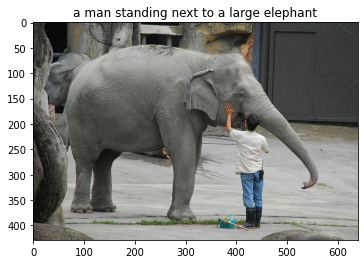

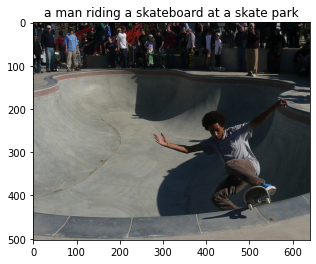

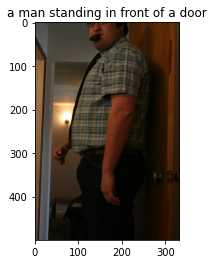

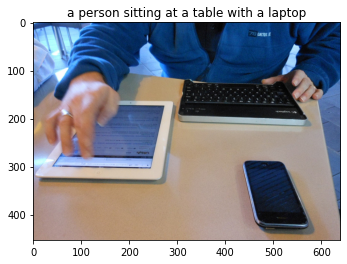

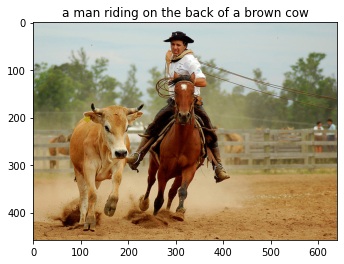

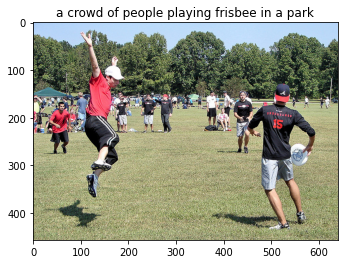

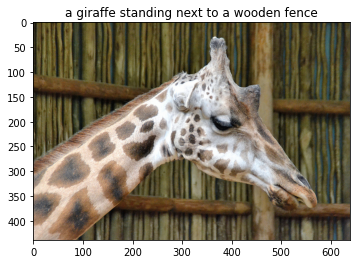

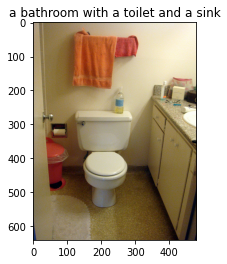

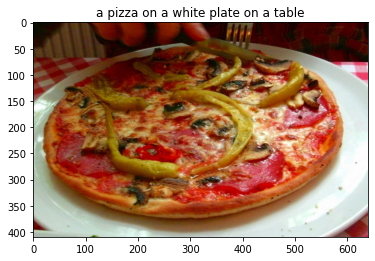

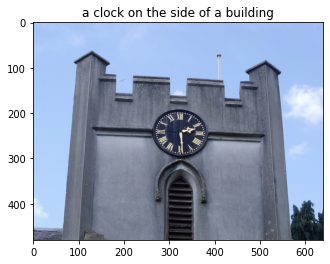

In [33]:
image_paths = glob.glob(os.path.join(test_image_path, "*.jpg"))[:10]

images = read_images(image_paths)

predictions = predict_step(images)
for img, pred in zip(images, predictions):
    plt.imshow(img)
    plt.title(pred)
    plt.show()